In [1]:
import kit
from kit import penguin_color
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)
import palmerpenguins
pg = palmerpenguins.load_penguins().dropna()

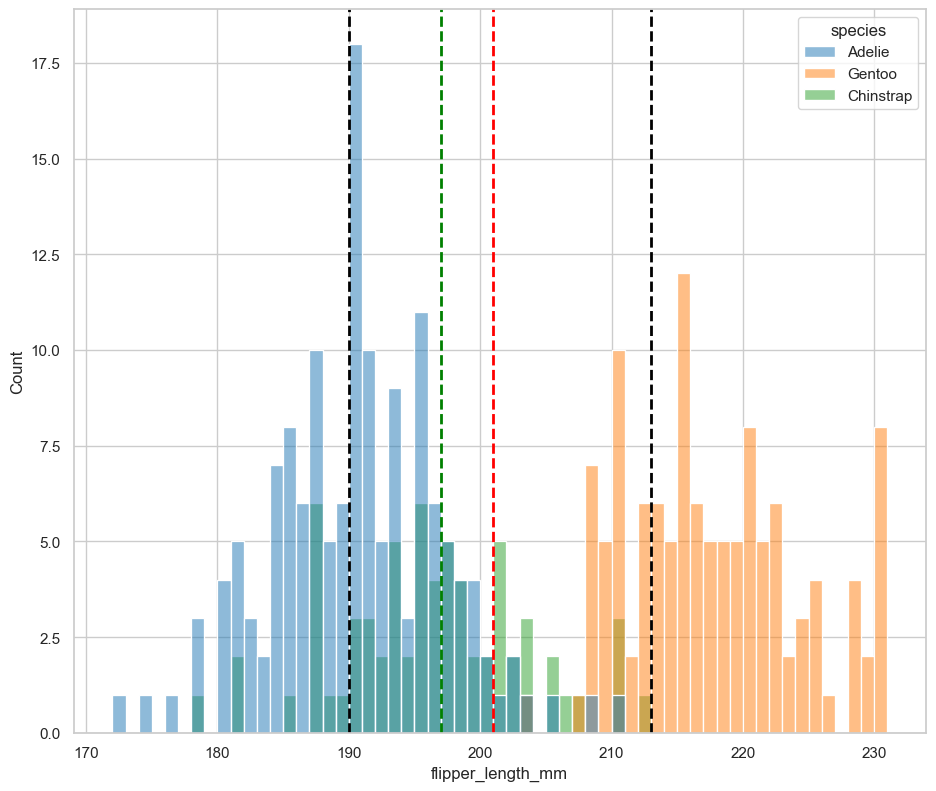

In [4]:
var = pg['flipper_length_mm']

graf = sns.histplot(
    data= pg,
    x= 'flipper_length_mm',
    binwidth= 1,
    hue= 'species',
    alpha= 0.5
)

# Mean (red)
plt.axvline(
    x= var.mean(),
    linestyle= 'dashed',
    color= 'r',
    linewidth= 2
)

# Median (green)
plt.axvline(
    x = var.median(),
    linestyle= 'dashed',
    color= 'g',
    linewidth= 2
)

# Q_25 (black)
plt.axvline(
    x = var.quantile(0.25),
    linestyle= 'dashed',
    color= 'k',
    linewidth= 2
)

# Q_75 (black)
plt.axvline(
    x = var.quantile(0.75),
    linestyle= 'dashed',
    color= 'k',
    linewidth= 2
)

In [11]:
pg.describe(include=np.number).columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'year'],
      dtype='object')

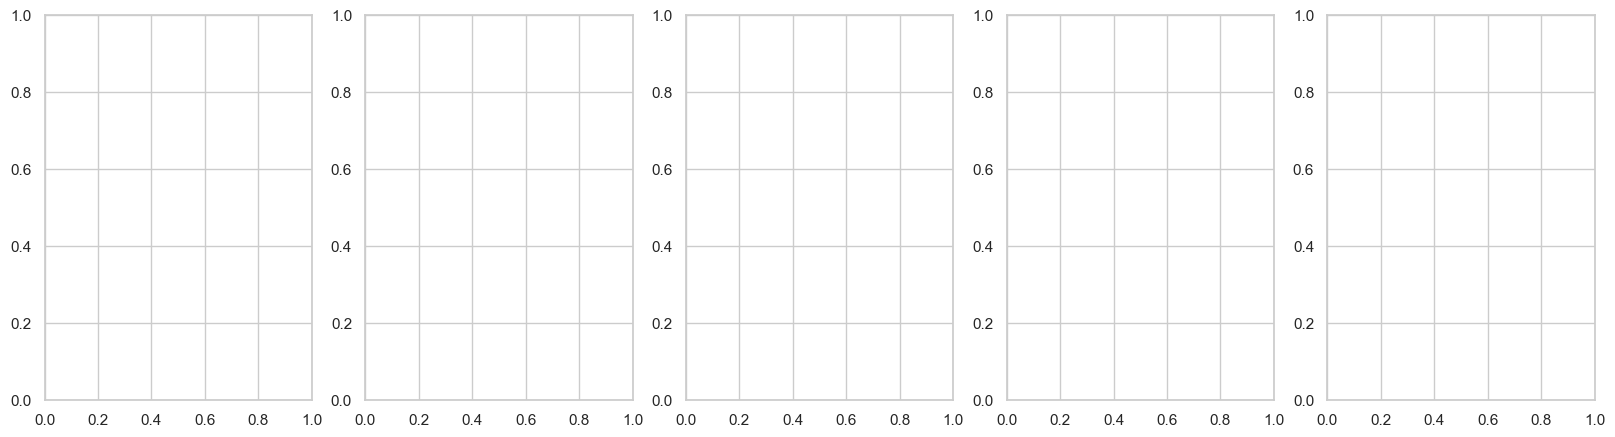

In [14]:
fig, ax = plt.subplots(1, 5, figsize= (20, 5))

<Axes: xlabel='bill_length_mm', ylabel='Count'>

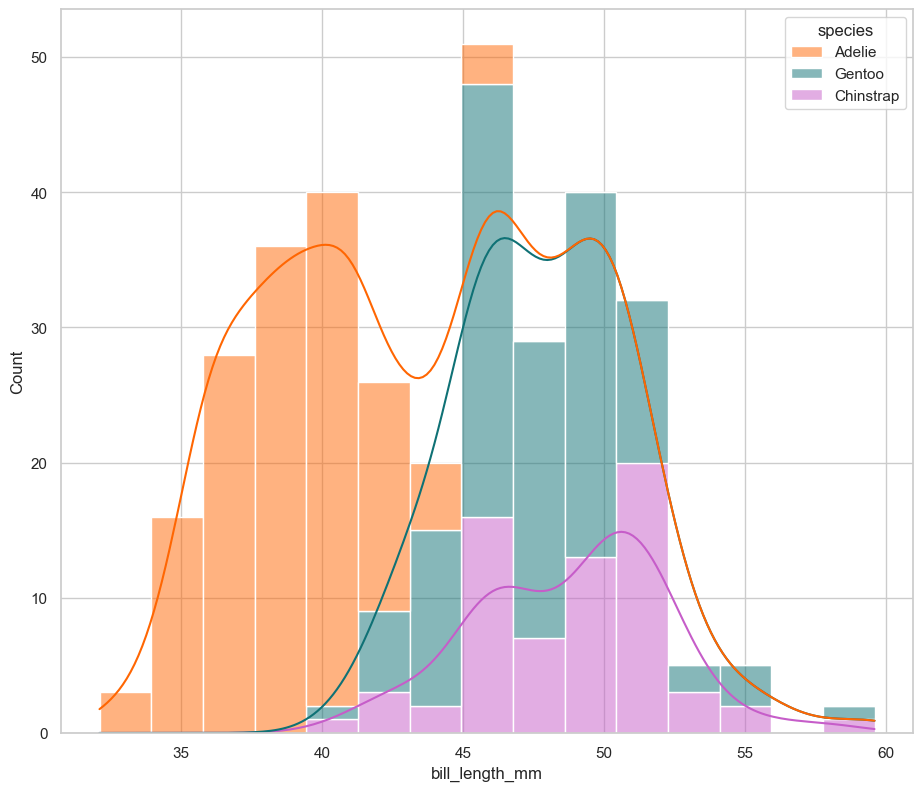

In [20]:
sns.histplot(
    data= pg,
    x= 'bill_length_mm',
    multiple= 'stack',
    hue= 'species',
    palette= penguin_color,
    bins= 15,
    alpha= 0.5,
    kde= True
)

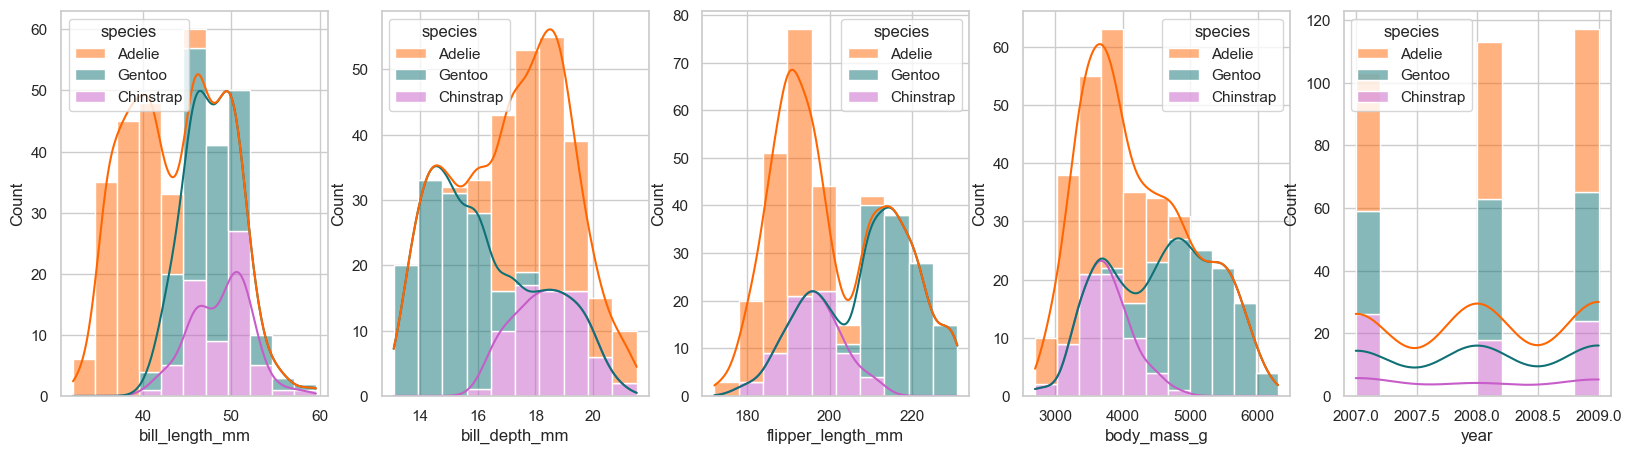

In [21]:
cols = pg.describe(include=np.number).columns
fig, ax = plt.subplots(1, len(cols), figsize= (20, 5))

for i in range(len(cols)):
    sns.histplot(
        ax= ax[i],
        data= pg,
        x= cols[i],
        multiple= 'stack',
        hue= 'species',
        palette= penguin_color,
        alpha= 0.5,
        kde= True
    )

In [23]:
pg['year'] = pg['year'].astype('Int64')

In [41]:
cols = np.array(pg.describe(include=np.float64).columns).reshape(2, 2)

In [39]:
cols = cols.reshape(2, 2)

In [42]:
cols[0]

array(['bill_length_mm', 'bill_depth_mm'], dtype=object)

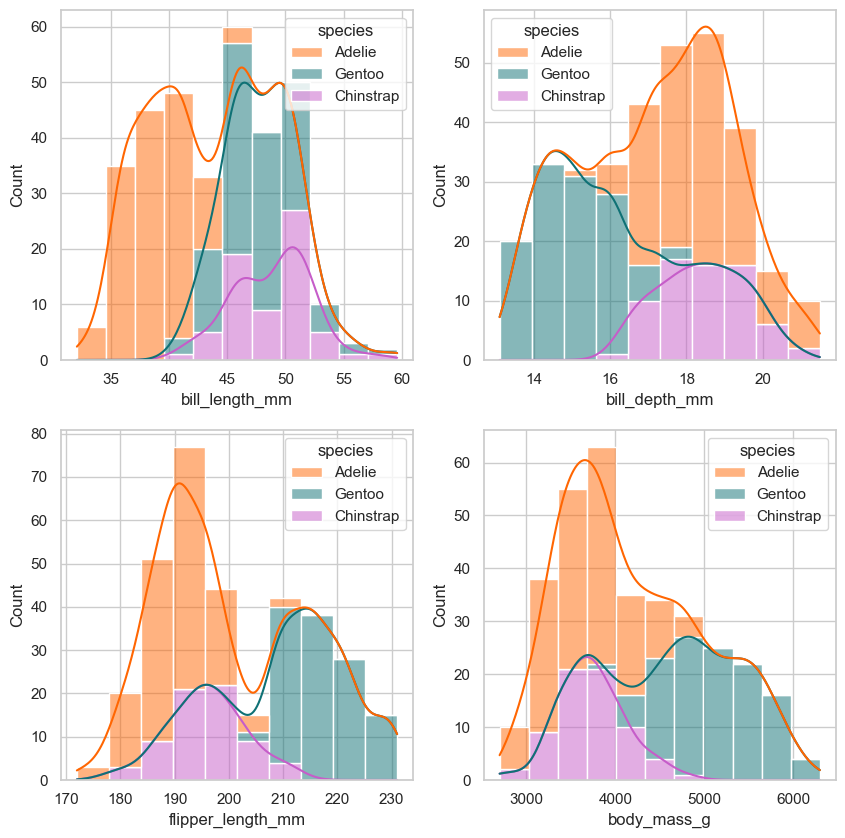

In [16]:
cols = np.array(pg.astype({'year': 'Int64'}).describe().columns).reshape(2, 2)

ig, ax = plt.subplots(len(cols), len(cols[0]), figsize=(10, 10))

for i in range(len(cols)):
    for j in range(len(cols[0])):
        (
            sns.histplot(
                ax=ax[i, j],
                data= pg,
                x= cols[i][j],
                multiple= 'stack',
                hue= 'species',
                palette= penguin_color,
                alpha= 0.5,
                kde= True
            )
        )